In [46]:
# import library
import torch
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#create data
def create_linear_data(n):
    w0, w1 = 2, 1.5
    x = torch.randint(5, size=(n,)) + torch.randn(n)
    y = w1 * x + w0 + torch.randn(n)/2

    # create vector one.
    ones = (torch.zeros_like(x) + 1)
    # couple vector x with vector one => matrix x.
    x = torch.cat([ones.reshape(-1, 1), x.reshape(-1, 1)], dim=1)

    y = y.reshape(-1, 1)
    return x, y



In [48]:
x, y = create_linear_data(50)

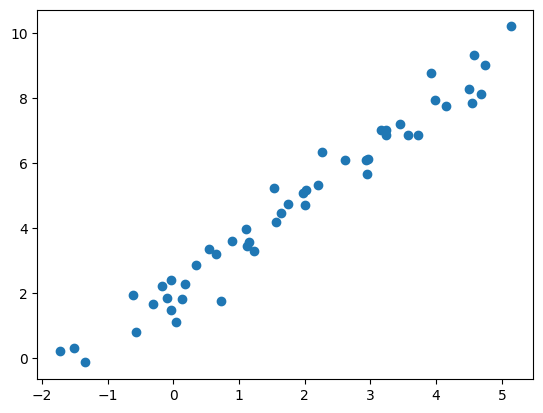

In [49]:
plt.scatter(x[:, 1], y)

In [51]:
def grad(w, x, y):
    y_hat = x @ w
    grad_w0 = y_hat - y     # trong R^N
    grad_w1 = (y_hat - y) * x[:,1]
    grad_n0 = grad_w0.mean().item()
    grad_n1 = grad_w1.mean().item()

    grad = torch.FloatTensor([grad_n0, grad_n1]).reshape(-1, 1) # Chồng 2 cái đạo hàm lên nhau
    print('grad: ', grad.size())
    return grad

In [74]:
def gradient_descent(w, x, y, grad,  lr, n_iter):
    for iter in range(n_iter):
        print('w', w.size())
        result_grad = grad(w, x, y)
        print('grad_result: ', result_grad.size())
        w = w - lr * grad(w, x, y)
    return w

In [75]:
w = torch.randn(2, 1)


In [76]:
w

tensor([[-0.4933],
        [ 0.0009]])

In [77]:
y_hat = x @ w

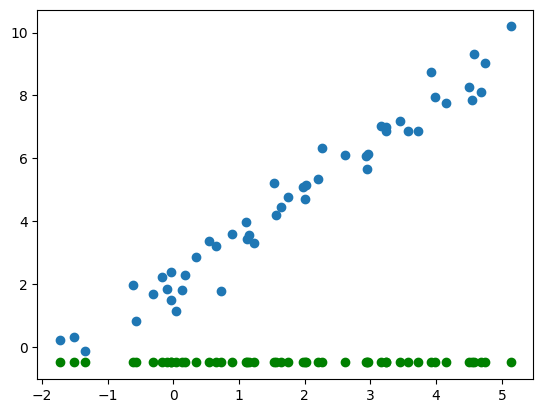

In [78]:
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], y_hat, c = 'g')

w torch.Size([2, 1])
grad:  torch.Size([2, 1])
grad_result:  torch.Size([2, 1])
grad:  torch.Size([2, 1])
torch.Size([2, 1])
torch.Size([50, 1])
torch.Size([50, 2])


tensor([[1.1844],
        [3.0463]])

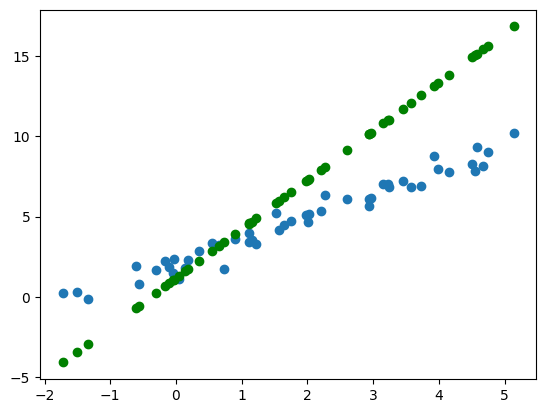

In [95]:
w = gradient_descent(w, x, y, grad=grad, lr=0.1, n_iter=1)
print(w.size())
y_hat = x @ w
print(y_hat.size())
print(x.size())
plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], y_hat, c = 'g')
w